In [450]:
%load_ext autoreload
%autoreload 2
from utils import *
import itertools
from IPython.display import display, HTML

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [79]:
BS_row_meta = "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/rows_metadata.csv"
BS_row_meta_withvar = "/Users/jiayao/Work/BrainDisorders/src/RecGenesExonsTargetedByLGD_wilger2014_predicted.xlsx"
wigler_fam_info = "/Users/jiayao/Work/BrainDisorders/data/nature13908-s2/Supplementary_Table_1.xlsx"
VarFil = "/Users/jiayao/Work/BrainDisorders/data/DenovoVariants/wigler2014RecProLGD.xlsx"

In [316]:
df_row = pd.read_excel(BS_row_meta_withvar, index_col="row_num")
df_row = pd.read_csv(BS_row_meta, index_col="row_num")
df_row["exon length"] = df_row["end"] - df_row["start"]
df_fam = pd.read_excel(wigler_fam_info)
df_var = pd.read_excel(VarFil)

In [115]:
ins = BrainSpan()
# Columns Meta Data
bp_exon_col_meta = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/columns_metadata.csv", delimiter=",")
bp_exon_col_meta.age.unique()
bp_exon_col_meta["Period"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[0], axis=1)
bp_exon_col_meta["Stage"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[1], axis=1)
bp_exon_col_meta["Description"] = bp_exon_col_meta.apply(lambda row: ins.TemporalMap(row["age"])[2], axis=1)
# Exon RPKM Norm by Gene RPKM
NormExonExp = pd.read_csv(
    "/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/NormedExonExpMatrix.csv", header = None)
NormExonExp.head(2)

,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,1,0.92888,0.994602,1.163014,1.058665,0.973158,1.077006,1.026251,0.991086,1.055019,...,1.260625,1.330526,1.289509,1.307571,1.108135,1.232750,1.339092,1.442238,1.217121,1.856548
1,2,2.16143,2.107543,2.173270,2.187017,1.935605,2.438935,2.067446,2.135616,2.197930,...,1.836202,1.777569,2.567087,2.037077,1.840848,1.859284,1.793013,2.138479,1.893857,0.803214


In [172]:
# Exon RPKM Matrix
ExonExp = pd.read_csv("../data/expression/brainspan/exons_matrix/expression_matrix.csv", header=None)
display(ExonExp.head(2))

,0,1,2,3,4,5,6,7,8,9,...,515,516,517,518,519,520,521,522,523,524
0,1,13.636583,40.862901,32.178981,27.939465,29.324584,23.885710,24.887880,16.432391,45.570680,...,4.347437,4.101772,2.987192,3.862508,3.362597,2.566516,3.049593,5.025746,1.893471,8.942586
1,2,31.731240,86.587706,60.131360,57.718046,58.326412,54.090394,50.138146,35.408905,94.937737,...,6.332389,5.479924,5.946744,6.017439,5.585987,3.870925,4.083335,7.451925,2.946266,3.868906


In [125]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
Regions = ["OFC", "VFC", "ITC", "DFC", "STC", "MFC"]

In [102]:
display(df_row.head(2))
display(df_fam.head(2))
print df_fam.columns.values
display(df_var.head(2))

,gene_id,ensembl_gene_id,gene_symbol,entrez_id,start,end
row_num,,,,,,
1,1086864,ENSG00000000003,TSPAN6,7105.0,99883666,99884983
2,1086864,ENSG00000000003,TSPAN6,7105.0,99885755,99885863


,familyId,collection,probandGender,siblingGender,SequencedAtCSHL,SequencedAtUW,SequencedAtYALE,motherRace,fatherRace,probandVIQ,...,fatherAgeInMonthsAtBirthOfProband,motherAgeInMonthsAtBirthOfSibling,fatherAgeInMonthsAtBirthOfSibling,prbRecLGDs,prbLGDs,prbMissense,prbSynonymous,sibLGDs,sibMissense,sibSynonymous
0,11542,ssc,F,F,NaN,"p1,s1",NaN,more-than-one-race,white,121.0,...,430.0,403.0,404.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0
1,13736,ssc,M,M,"p1,s1",NaN,NaN,white,white,119.0,...,400.0,425.0,429.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


[u'familyId' u'collection' u'probandGender' u'siblingGender'
 u'SequencedAtCSHL' u'SequencedAtUW' u'SequencedAtYALE' u'motherRace'
 u'fatherRace' u'probandVIQ' u'probandNVIQ'
 u'motherAgeInMonthsAtBirthOfProband' u'fatherAgeInMonthsAtBirthOfProband'
 u'motherAgeInMonthsAtBirthOfSibling' u'fatherAgeInMonthsAtBirthOfSibling'
 u'prbRecLGDs' u'prbLGDs' u'prbMissense' u'prbSynonymous' u'sibLGDs'
 u'sibMissense' u'sibSynonymous']


,familyId,location,variant,vcfVariant,inChild,fromParent,effectGene,GeneCount,effectType,familyDescription,CSHL,YALE,UW,IossifovWE2012,EichlerWE2012,StateWE2012,EichlerTG2012
0,13545,20:49509095,ins(T),20:49509094:G:GT,pM,NaN,ADNP,2,frame-shift,pM,NaN,strong:valid,NaN,NaN,NaN,NaN,yes
1,12130,20:49510028,del(2),20:49510027:CTT:C,pF,NaN,ADNP,2,frame-shift,pF,NaN,NaN,strong:valid,NaN,yes,NaN,NaN


In [113]:
def sameExon(var1, var2, gene, row_meta):
    gene_df = row_meta[row_meta["gene_symbol"]==gene]
    pos_1 = int(var1.split(":")[1])
    pos_2 = int(var2.split(":")[1])
    exon_1, exon_2 = None, None
    for i, row in gene_df.iterrows():
        start = int(row["start"]) - 2
        end = int(row["end"]) + 2
        if pos_1 >= start and pos_1 <= end:
            exon_1 = i
        if pos_2 >= start and pos_2 <= end:
            exon_2 = i
    return (exon_1 == exon_2) and (exon_1 != None) and (exon_2 != None)

def get_exon_id(var, gene, row_meta):
    gene_df = row_meta[row_meta["gene_symbol"]==gene]
    pos = int(var.split(":")[1])
    for i, row in gene_df.iterrows():
        start = int(row["start"]) - 2
        end = int(row["end"]) + 2
        if pos >= start and pos <= end:
            return i
    return None
def isLastExon(exon_id, row_meta):
    gene = row_meta.get_value(exon_id, "gene_symbol")
    next_gene = row_meta.get_value(exon_id+1, "gene_symbol")
    return not (gene == next_gene)
#Group all the LoF to gene
Gene2Vars = {}
Genes = list(set(df_var["effectGene"].values))
VIQ_sg_diffs = np.array([])
NVIQ_sg_diffs = np.array([])
VIQ_se_diffs = np.array([])
NVIQ_se_diffs = np.array([])
for gene in Genes:
    tmp_df = df_var[df_var["effectGene"]==gene]
    famids = tmp_df["familyId"]
    varids = tmp_df["location"]
    pairs = list(itertools.combinations(zip(famids, varids), 2)) #Get var pair
    #print tmp_df.shape, len(famids)
    #print pairs
    for pair in pairs:
        (fam1,var1), (fam2,var2) = pair
        exon_1, exon_2 = get_exon_id(var1, gene, df_row), get_exon_id(var2, gene, df_row)
        if exon_1 == None or exon_2 == None:
            continue
        if isLastExon(exon_1, df_row) or isLastExon(exon_2, df_row):
            continue
        VIQ_diff  = abs( float(df_fam[df_fam["familyId"] == fam1]["probandVIQ"].values[0]) - 
                         float(df_fam[df_fam["familyId"] == fam2]["probandVIQ"].values[0]) )
        NVIQ_diff = abs( float(df_fam[df_fam["familyId"] == fam1]["probandNVIQ"].values[0]) - 
                         float(df_fam[df_fam["familyId"] == fam2]["probandNVIQ"].values[0]) )
        if sameExon(var1, var2, gene, df_row): #same exon
            VIQ_se_diffs = np.append(VIQ_se_diffs, VIQ_diff)
            NVIQ_se_diffs = np.append(NVIQ_se_diffs, NVIQ_diff)
        VIQ_sg_diffs = np.append(VIQ_sg_diffs, VIQ_diff)
        NVIQ_sg_diffs = np.append(NVIQ_sg_diffs, NVIQ_diff)    
        #print NVIQ_diffs
        #print VIQ_diffs
#print VIQ_diffs
#print NVIQ_sg_diffs

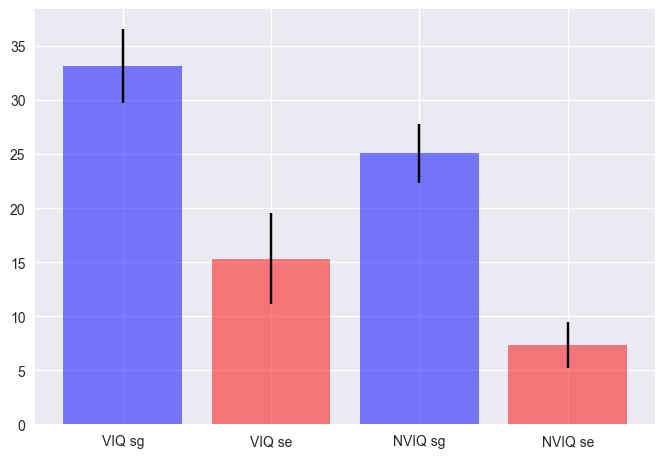

In [114]:
VIQ_sg_mean = np.mean(VIQ_sg_diffs)
VIQ_sg_mean_var = np.std(VIQ_sg_diffs)/math.sqrt(VIQ_sg_diffs.size)
VIQ_se_mean = np.mean(VIQ_se_diffs)
VIQ_se_mean_var = np.std(VIQ_se_diffs)/math.sqrt(VIQ_se_diffs.size)
NVIQ_sg_mean = np.mean(NVIQ_sg_diffs)
NVIQ_sg_mean_var = np.std(NVIQ_sg_diffs)/math.sqrt(NVIQ_sg_diffs.size)
NVIQ_se_mean = np.mean(NVIQ_se_diffs)
NVIQ_se_mean_var = np.std(NVIQ_se_diffs)/math.sqrt(NVIQ_se_diffs.size)

materials = ['VIQ sg', 'VIQ se', 'NVIQ sg', 'NVIQ se']
x_pos = np.arange(len(materials))
CTEs = [VIQ_sg_mean, VIQ_se_mean, NVIQ_sg_mean, NVIQ_se_mean]
error = [VIQ_sg_mean_var, VIQ_se_mean_var,NVIQ_sg_mean_var, NVIQ_se_mean_var]

fig, ax = plt.subplots(dpi=100)

ax.bar(x_pos, CTEs, yerr=error, align='center', alpha=0.5, color = ['b','r','b','r'], ecolor='black', capsize=10)
ax.set_xticks(x_pos)
ax.set_xticklabels(materials)
plt.show()

In [227]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import scipy
def regGene(dat):
    regr = linear_model.LinearRegression(fit_intercept=False)
    X_train = np.array([[x[4]] for x in dat])
    y_train = np.array([x[3] for x in dat])
    regr.fit(X_train, y_train)
    return regr
def plotGene(gene, regr, dat):
    X_train = np.array([[x[4]] for x in dat])
    y_train = np.array([x[3] for x in dat])
    y_pred = regr.predict(X_train)
    #print('Coefficients:', regr.coef_)
    R, P = scipy.stats.pearsonr([x[0] for x in X_train], y_train)
    plt.title("Gene:{}, R:{}, P:{}".format(gene, R,P))
    plt.xlim(0,3)
    plt.ylim(0, max(y_train+y_pred))
    plt.scatter(X_train, y_train,  color='black')
    plt.plot(np.append(X_train, [0]), np.append(y_pred, 0), color='blue', linewidth=3)
    plt.show()

In [230]:
def getIQ(famID, which="probandNVIQ"):
    return float(df_fam[df_fam["familyId"] == famID][which].values[0])
def avgseq(seq, start, end):
    if seq == None:
        return None
    return np.mean(seq[start: end])

gene = "KATNAL2"
tmp_df = df_var[df_var["effectGene"]==gene]
famids = tmp_df["familyId"]
varids = tmp_df["location"]
#display(tmp_df)
exonids = [get_exon_id(x, gene, df_row) for x in varids]
rel_exps = []
for exonid in exonids:
    try:
        seq,error,mdeian = ins.LoadingDat2SeqCrossRecordCrossRegion([exonid],Regionsgt20,
                                                                    df_row,bp_exon_col_meta,NormExonExp)
    except:
        seq = None
    rel_exp = avgseq(seq, 0, 10)
    rel_exps.append(rel_exp)
IQs = [max(0, (100-getIQ(x))) for x in famids]
#exonids = [x for x in exonids if x!=None]
dat = zip(famids, varids, exonids, IQs, rel_exps)
dat = [x for x in dat if x[2]!= None]
print dat

[(11008, u'18:44589733', 168790, 0, 1.6933606010356734), (11872, u'18:44603833', 168795, 35.0, 2.2243237145453447)]


In [295]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
    
# linear_model for each gene
gene2slope = {}
ALL_RelExp = np.array([])
ALL_Normed_IQD = np.array([])
for gene in Genes:
    tmp_df = df_var[df_var["effectGene"]==gene]
    famids = tmp_df["familyId"]
    varids = tmp_df["location"]
    exonids = [get_exon_id(x, gene, df_row) for x in varids]
    exonids = [x for x in exonids if x != None]
    #print exonids
    exonids = [x for x in exonids if not isLastExon(x, df_row)]
    rel_exps = []
    for exonid in exonids:
        try:
            seq,error,mdeian = ins.LoadingDat2SeqCrossRecordCrossRegion([exonid],Regionsgt20,
                                                                        df_row,bp_exon_col_meta,NormExonExp)
        except:
            seq = None
        rel_exp = avgseq(seq, 0, 3)
        rel_exps.append(rel_exp)
    IQs = [max(0, (100-getIQ(x))) for x in famids]
    #exonids = [x for x in exonids if x!=None]
    dat = zip(famids, varids, exonids, IQs, rel_exps)
    dat = [x for x in dat if x[2]!= None]
    rel_exps = np.array([[x[4]] for x in dat])
    
    IQDs = np.array([x[3] for x in dat])
    if dat == []:
        continue
    regr = regGene(dat)
    slope = regr.coef_[0]
    if slope == 0:
        continue
    gene2slope[gene] = slope
    ALL_RelExp = np.append(ALL_RelExp, rel_exps)
    NormIQDs = np.array([x[3]/slope for x in dat])
    ALL_Normed_IQD = np.append(ALL_Normed_IQD, NormIQDs)
    #print NormIQDs
    #plotGene(gene, regr, dat)
    

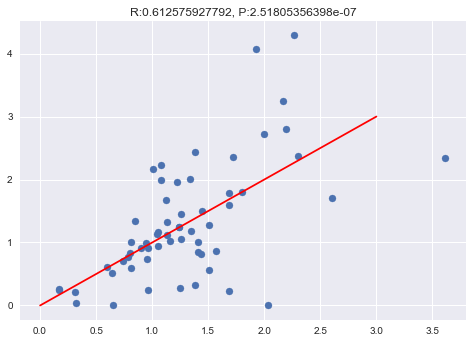

In [296]:
model = linear_model.LinearRegression(fit_intercept=False)
ALL_RelExp = ALL_RelExp.reshape(-1,1)
R, P = scipy.stats.pearsonr([x[0] for x in ALL_RelExp], ALL_Normed_IQD) 
plt.title("R:{}, P:{}".format(R,P))
model.fit(ALL_RelExp, ALL_Normed_IQD)
plt.scatter(ALL_RelExp, ALL_Normed_IQD)
plt.plot([0, 3], [0,model.predict(3.0)], color='red')
plt.show()

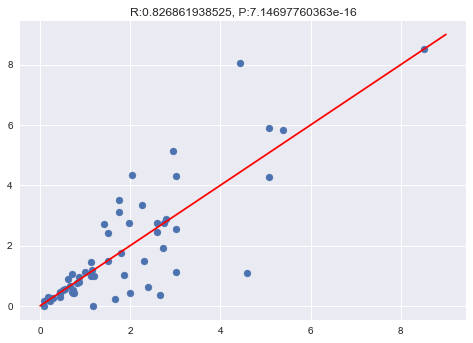

In [303]:
Regionsgt20 = ['OFC', 'VFC', 'HIP', 'ITC', 'AMY', 'DFC', 'STC', 'MFC', 'STR', 'IPC', 
            'V1C', 'S1C', 'A1C', 'M1C', 'CBC', 'MD']
    
# linear_model for each gene
gene2slope = {}
ALL_RelExp = np.array([])
ALL_Normed_IQD = np.array([])
for gene in Genes:
    tmp_df = df_var[df_var["effectGene"]==gene]
    famids = tmp_df["familyId"]
    varids = tmp_df["location"]
    exonids = [get_exon_id(x, gene, df_row) for x in varids]
    exonids = [x for x in exonids if x != None]
    #print exonids
    exonids = [x for x in exonids if not isLastExon(x, df_row)]
    rel_exps = []
    for exonid in exonids:
        try:
            seq,error,mdeian = ins.LoadingDat2SeqCrossRecordCrossRegion([exonid],Regionsgt20,
                                                                        df_row,bp_exon_col_meta,ExonExp)
        except:
            seq = None
        rel_exp = avgseq(seq, 0, 3)  ####################################
        #rel_exp = math.log(rel_exp + 1, 10)
        rel_exp = rel_exp/10
        rel_exps.append(rel_exp)
    IQs = [max(0, (100-getIQ(x))) for x in famids]
    #exonids = [x for x in exonids if x!=None]
    dat = zip(famids, varids, exonids, IQs, rel_exps)
    dat = [x for x in dat if x[2]!= None]
    rel_exps = np.array([[x[4]] for x in dat])
    
    IQDs = np.array([x[3] for x in dat])
    if dat == []:
        continue
    regr = regGene(dat)
    slope = regr.coef_[0]
    if slope == 0:
        continue
    gene2slope[gene] = slope
    ALL_RelExp = np.append(ALL_RelExp, rel_exps)
    NormIQDs = np.array([x[3]/slope for x in dat])
    ALL_Normed_IQD = np.append(ALL_Normed_IQD, NormIQDs)
    #print NormIQDs
    #plotGene(gene, regr, dat)
    
model = linear_model.LinearRegression(fit_intercept=False)
ALL_RelExp = ALL_RelExp.reshape(-1,1)
R, P = scipy.stats.pearsonr([x[0] for x in ALL_RelExp], ALL_Normed_IQD) 
plt.title("R:{}, P:{}".format(R,P))
model.fit(ALL_RelExp, ALL_Normed_IQD)
plt.scatter(ALL_RelExp, ALL_Normed_IQD)
#plt.plot([0, 3], [0, model.predict(3.0)], color='red')
plt.plot([0, 9], [0, model.predict(9)], color='red')
plt.show()

In [308]:
import random
import bisect
import collections

def cdf(weights):
    total = sum(weights)
    result = []
    cumsum = 0
    for w in weights:
        cumsum += w
        result.append(cumsum / total)
    return result

def choice(population, weights):
    assert len(population) == len(weights)
    cdf_vals = cdf(weights)
    x = random.random()
    idx = bisect.bisect(cdf_vals, x)
    return population[idx]

weights=[0.3, 0.2, 0.5]
population = ['A', 'B','D']
counts = collections.defaultdict(int)
for i in range(10000):
    counts[choice(population, weights)] += 1
print(counts)

defaultdict(<type 'int'>, {'A': 3075, 'B': 1913, 'D': 5012})


In [323]:
def GetExonProb(exon_df):
    Total_length = sum(exon_df["exon length"].values)
    Probs = [float(x)/Total_length for x in exon_df["exon length"].values]
    return exon_df.index.values, Probs

In [330]:
gene = "CHD8"
tmp_df = df_row[df_row["gene_symbol"]==gene]
population, weights = GetExonProb(tmp_df)
#print population, weights, tmp_df["exon length"].values, sum(tmp_df["exon length"].values)
counts = collections.defaultdict(int)
for i in range(6):
    counts[choice(population, weights)] += 1
print(counts)

defaultdict(<type 'int'>, {40609: 1, 40594: 1, 40587: 2, 40595: 1, 40611: 1})


# Oberved

In [332]:
exon_exp_avg2time = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/exon_exp_avg2time.csv", index_col="column_num")
exon_exp_avg2time.head()

,mean_2A,mean_2B,mean_3A,mean_3B,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,...,var_mean_3A,var_mean_3B,var_mean_4,var_mean_5,var_mean_6,var_mean_7,var_mean_8,var_mean_9,var_mean_10,var_mean_11
column_num,,,,,,,,,,,,,,,,,,,,,
1,27.206792,11.945280,11.393492,11.134947,9.558639,18.157519,10.861553,4.447872,6.492094,7.360344,...,0.737738,0.781834,1.249085,2.249990,1.033034,0.164623,0.167769,0.324082,0.055629,0.050158
2,55.813774,20.932610,19.904949,21.053577,15.675466,28.367266,19.322574,7.411997,9.424933,9.976683,...,3.106944,3.634774,4.036335,5.605992,3.637806,0.514675,0.495950,1.230839,0.141350,0.122251
3,51.877128,16.402806,18.060453,17.258316,13.956643,22.241407,15.050154,6.841470,8.433788,7.175535,...,2.318481,2.457093,3.462134,3.706581,1.814199,0.579492,0.400265,0.643999,0.102219,0.108002
4,47.891733,15.475496,17.213090,15.783500,14.020153,19.593930,12.719863,7.246701,7.545300,7.493132,...,2.134149,2.096882,3.858717,2.654045,1.199371,0.816475,0.306096,0.758346,0.153112,0.114953
5,51.082333,17.563175,16.425459,16.638465,14.555101,19.700541,13.221177,8.602071,7.100054,9.645428,...,2.175714,2.292704,3.939062,2.582247,1.441087,0.904459,0.332391,0.921202,0.172075,0.092366


In [333]:
exon_ralexp_avg2time = pd.read_csv("/Users/jiayao/Work/BrainDisorders/data/expression/brainspan/exons_matrix/exon_ralexp_avg2time.csv", index_col="column_num")
exon_ralexp_avg2time.head()

,mean_2A,mean_2B,mean_3A,mean_3B,mean_4,mean_5,mean_6,mean_7,mean_8,mean_9,...,var_mean_3A,var_mean_3B,var_mean_4,var_mean_5,var_mean_6,var_mean_7,var_mean_8,var_mean_9,var_mean_10,var_mean_11
column_num,,,,,,,,,,,,,,,,,,,,,
1,1.075084,1.183650,1.169271,1.158210,1.232516,1.307427,1.241760,1.173519,1.339149,1.357412,...,0.000100,0.000202,0.001209,0.000234,0.000248,0.000643,0.000638,0.000594,0.000346,0.000246
2,2.217012,2.098475,1.995749,2.172308,1.944437,2.045075,2.164930,1.970295,1.952420,1.700918,...,0.002874,0.001900,0.004251,0.003179,0.005760,0.009842,0.006291,0.013588,0.006004,0.004770
3,1.990223,1.693847,1.838248,1.754957,1.716236,1.597342,1.745659,1.790066,1.711246,1.223989,...,0.002165,0.003012,0.005572,0.002265,0.004931,0.015320,0.004181,0.006437,0.004413,0.004521
4,1.855442,1.597686,1.752063,1.597275,1.695174,1.407171,1.510572,1.907862,1.545863,1.282476,...,0.002579,0.003389,0.003285,0.002506,0.005166,0.021346,0.004927,0.009097,0.005283,0.003719
5,1.968446,1.745040,1.671099,1.701349,1.772580,1.459060,1.567915,2.295270,1.444228,1.729555,...,0.003832,0.002809,0.009827,0.002697,0.010653,0.029067,0.004710,0.012593,0.007039,0.005299


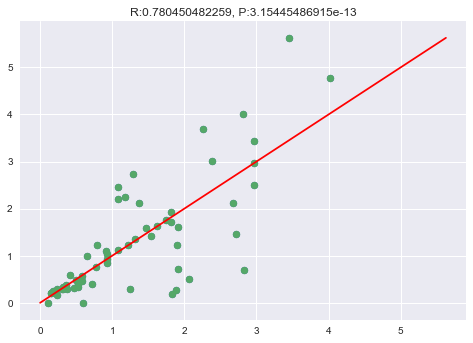

In [391]:
rel_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_exp_avg2time)
rel_pre.model(df_row)

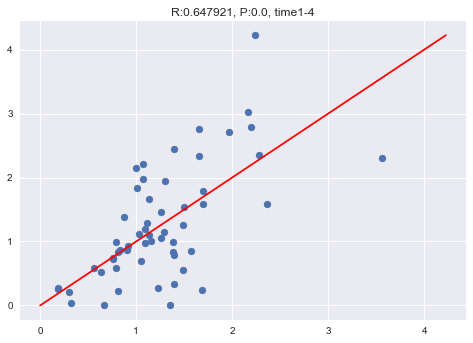

In [496]:
rel_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_ralexp_avg2time)
rel_pre.LoadData(df_row, time_start=1, time_end=4)
rel_pre.model2(plot=True)

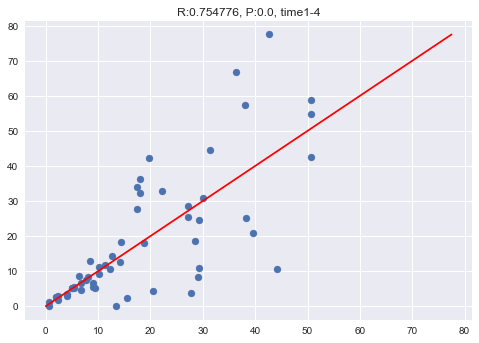

In [497]:
abs_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_exp_avg2time)
abs_pre.LoadData(df_row, time_start=1, time_end=4)
abs_pre.model2(plot=True)

# Prediction

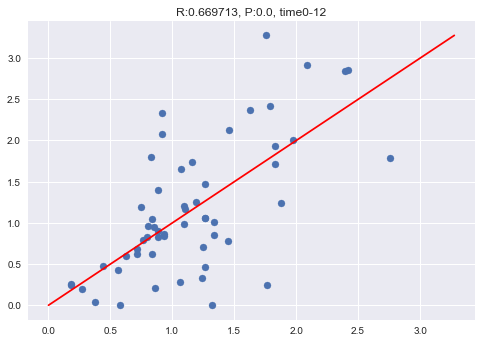

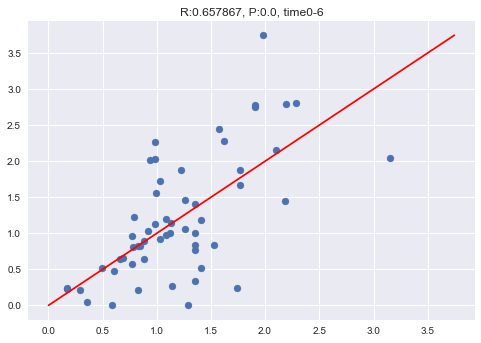

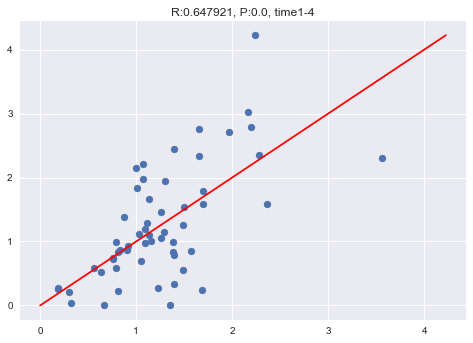

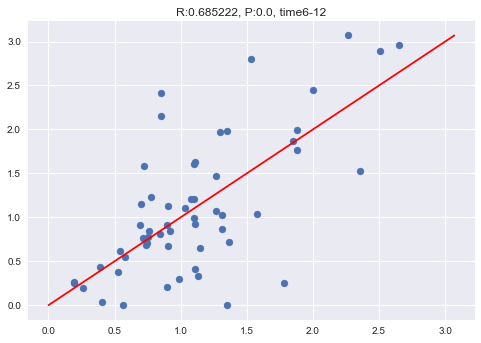

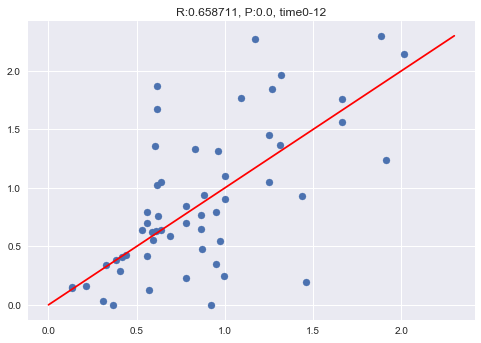

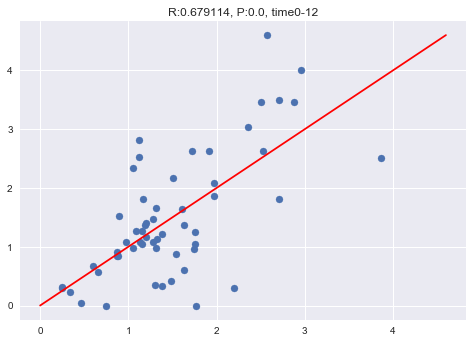

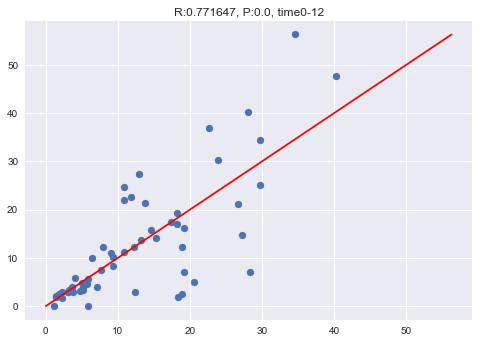

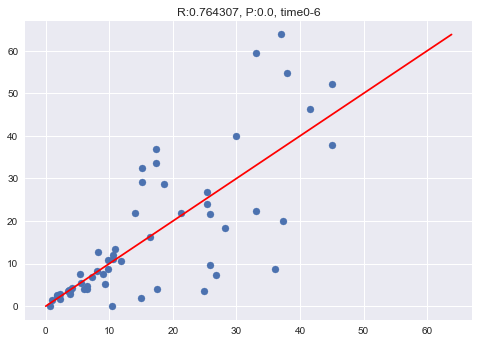

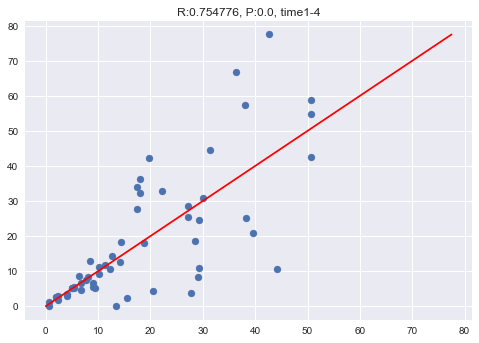

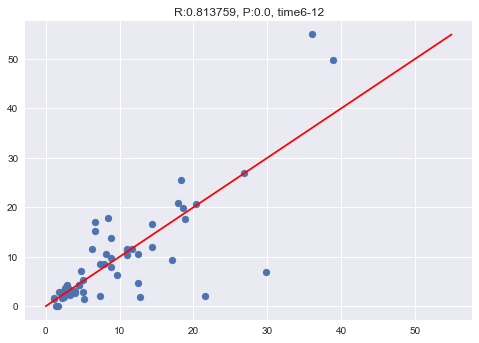

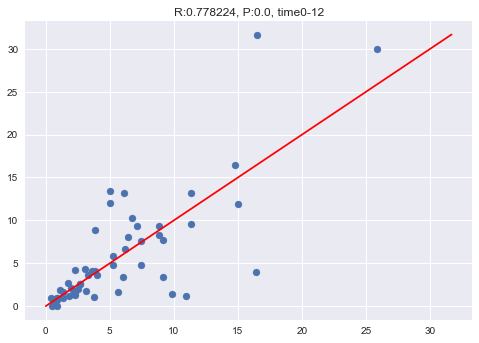

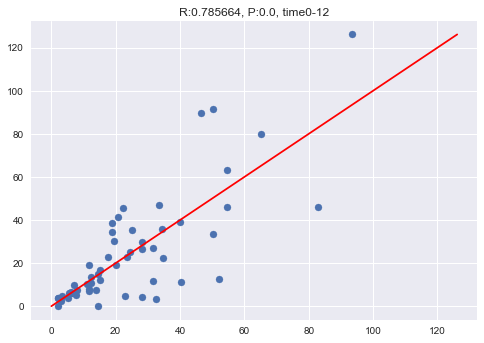

11.6364599625 13.5342269112 13.1331908891 12.2198517224 11.3378615679 13.3077283574 11.3762382705 12.3082219086 12.7220178655 11.9271093587 13.0324020996 13.0558363457

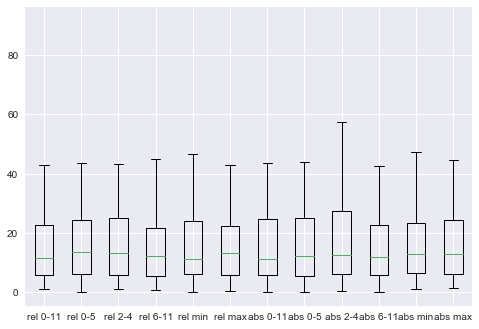

In [532]:
rel_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_ralexp_avg2time)
abs_pre = PredictIQFromExon(VarFil, wigler_fam_info, exon_exp_avg2time)
diffs1 = []
for s, e in [(0,12), (0,6), (1,4), (6,12), ('min', 'min'), ('max', 'max')]:
    if s in ['min', 'max']:
        rel_pre.LoadData(df_row, method = s)
    else:
        rel_pre.LoadData(df_row, time_start=s, time_end=e)
    rel_pre.model2()
    diff = []
    for varid, var in rel_pre.VarList.items():
        IQ = 100 - var.ProbandIQ
        rel_pre.model2(plot=False, var2leave=varid)
        if var.Gene not in rel_pre.gene2slope:
            continue
        IQD_pre = rel_pre.Predict(var)
        IQ_pre = 100 - IQD_pre
        diff.append(abs(IQ-IQ_pre))
    diffs1.append(np.array(diff))
diffs2 = []
for s, e in [(0,12), (0,6), (1,4), (6,12), ('min', 'min'), ('max', 'max')]:
    if s in ['min', 'max']:
        abs_pre.LoadData(df_row, method = s)
    else:
        abs_pre.LoadData(df_row, time_start=s, time_end=e)
    abs_pre.model2()
    diff = []
    for varid, var in abs_pre.VarList.items():
        IQ = 100 - var.ProbandIQ
        abs_pre.model2(plot=False, var2leave=varid)
        if var.Gene not in abs_pre.gene2slope:
            continue
        IQD_pre = abs_pre.Predict(var)
        IQ_pre = 100 - IQD_pre
        diff.append(abs(IQ-IQ_pre))
    diffs2.append(np.array(diff))
for i in diffs1+diffs2:
    print np.median(i),
plt.boxplot(diffs1+diffs2, labels = ["rel 0-11", "rel 0-5", "rel 2-4", "rel 6-11", "rel min", "rel max" ,
                                     "abs 0-11", "abs 0-5", "abs 2-4", "abs 6-11", "abs min", "abs max"])
plt.show()

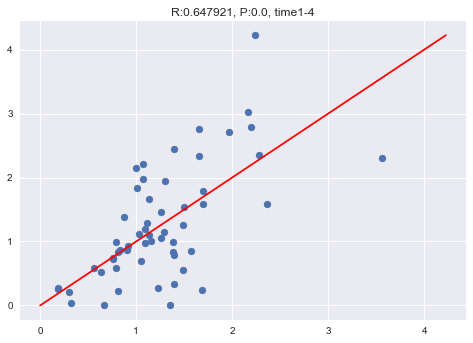

In [528]:
rel_pre1 = PredictIQFromExon(VarFil, wigler_fam_info, exon_ralexp_avg2time)
rel_pre1.LoadData(df_row, time_start=1, time_end=4)
rel_pre1.model2(plot=True)

FOXP1 15.619740238
GIGYF1 16.4104344931
DIP2A 13.2581456848
TNRC6B 22.2327621984
DSCAM 26.1938781197
NCKAP1 22.4486394272
ANKRD11 27.5347917391
GRIN2B 40.6797911155
CHD2 70.7048456051
CHD8 29.8340004198
ADNP 42.3978647326
SCN2A 42.8854586142
KDM6B 6.54162235265
DYRK1A 27.0616498474
RIMS1 21.6681416017
WAC 51.2618044556
KATNAL2 12.664438207
MED13L 41.4715450646
TCF7L2 17.5527053912
POGZ 15.0650010486
ANK2 8.69356317862
WDFY3 33.8342540908
KDM5B 15.0918603129
15.0918603129


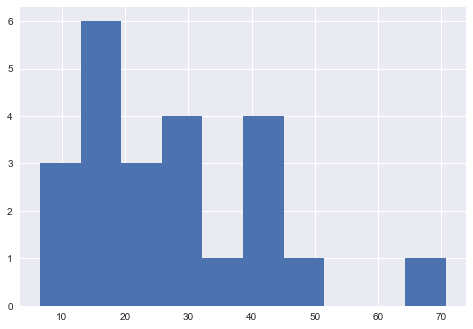

In [531]:
slopes = []
for gene, slope in rel_pre1.gene2slope.items():
    print gene, slope
    slopes.append(slope)
print np.median(slope)
plt.hist(slopes)
plt.show()

# Permute

In [360]:
Genes = list(set(df_var["effectGene"].values))
#Get IQ of each genes
Gene2num = []
for gene in Genes:
    
Rs = []
for i in xrange(1000):
    gene2slope = {}
    ALL_RelExp = np.array([])
    ALL_Normed_IQD = np.array([])
    for gene in Genes:
        tmp_df = df_var[df_var["effectGene"]==gene]
        famids = tmp_df["familyId"]
        varids = tmp_df["location"]
        exonids = [get_exon_id(x, gene, df_row) for x in varids]
        exonids = [x for x in exonids if x != None]
        #print exonids
        exonids = [x for x in exonids if not isLastExon(x, df_row)]
        rel_exps = []
        for exonid in exonids:
            seq = exon_ralexp_avg2time.iloc[exonid-1, 0:12].values
            #print seq
            rel_exp = avgseq(seq, 0, 12)
            rel_exps.append(rel_exp)
        IQs = [max(0, (100-getIQ(x))) for x in famids]
        #exonids = [x for x in exonids if x!=None]
        dat = zip(famids, varids, exonids, IQs, rel_exps)
        dat = [x for x in dat if x[2]!= None]
        rel_exps = np.array([[x[4]] for x in dat])

        IQDs = np.array([x[3] for x in dat])
        if dat == []:
            continue
        regr = regGene(dat)
        slope = regr.coef_[0]
        if slope == 0:
            continue
        gene2slope[gene] = slope
        ALL_RelExp = np.append(ALL_RelExp, rel_exps)
        NormIQDs = np.array([x[3]/slope for x in dat])
        ALL_Normed_IQD = np.append(ALL_Normed_IQD, NormIQDs)
    
    model = linear_model.LinearRegression(fit_intercept=False)
    ALL_RelExp = ALL_RelExp.reshape(-1,1)
    R, P = scipy.stats.pearsonr([x[0] for x in ALL_RelExp], ALL_Normed_IQD) 
    Rs.append(R)

IndentationError: expected an indented block (<ipython-input-360-e6ea6010ef4a>, line 6)